# Q16: 25-Aug-2022

Please refer to the “Perfume Data” from UCI ML repository. This data consists of odors of 20 different perfumes. Data was obtained by using a handheld odor meter (OMX-GR sensor) per second for 28 seconds period.
The dataset is available on GitHub here - https://github.com/Accelerate-AI/UnsupervisedLearning_Clustering/blob/main/DailyQuestions/perfume_data.xlsx


Perform cluster analysis using Kmeans clustering.

    a)What is the optimum no. of clusters?
    b)How do you see perfumes are segmented? Provide your inference.

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("perfume_data.xlsx", header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,ajayeb,64558,64556,64543,64543,64541,64543,64543,64541,64541,...,64541,64541,64541,64541,64541,64541,64528,64528,64528,64528
1,ajmal,60502,60489,61485,60487,61485,61513,60515,60500,60500,...,60472,60472,60461,61470,60487,60487,61485,60487,60472,60472


In [3]:
num_features = ['feature_' + str(x) for x in range(1, df.shape[1])]
df.columns = ['perfume_name'] + num_features
df.head(2)

,perfume_name,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,ajayeb,64558,64556,64543,64543,64541,64543,64543,64541,64541,...,64541,64541,64541,64541,64541,64541,64528,64528,64528,64528
1,ajmal,60502,60489,61485,60487,61485,61513,60515,60500,60500,...,60472,60472,60461,61470,60487,60487,61485,60487,60472,60472


In [4]:
# we dont need to scale the features, since every feature represents same reading, but at different times
# start kmeans
sse, slc = {}, {}
x=df[num_features]
for k in range(2, 8):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(x)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    slc[k] = silhouette_score(x, clusters)

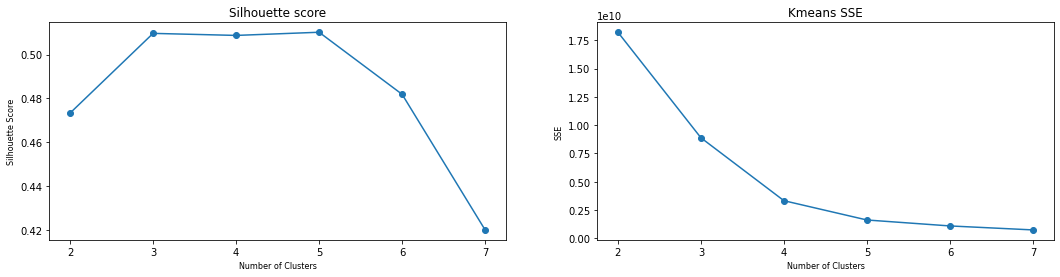

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4), sharex=False, sharey=False)

# Visualize clusters
#ax1.set_title('Data')
#sns.scatterplot(data=df, x='feature_1', y='feature_2', hue = 'clusters', ax=ax1);

# Visualize Silhouette score
ax1.plot(list(slc.keys()), list(slc.values()), marker='o')
ax1.set_title('Silhouette score')
ax1.set_xlabel('Number of Clusters', fontsize=8)
ax1.set_ylabel('Silhouette Score', fontsize=8)

# Visaulize kmeans cluster
ax2.plot(list(sse.keys()), list(sse.values()), marker='o')
ax2.set_title('Kmeans SSE')
ax2.set_xlabel('Number of Clusters', fontsize=8)
ax2.set_ylabel('SSE', fontsize=8)
plt.show()

In [6]:
# By comparing both Sihouette score as well as elbow of Kmeans SSE, we can go with k = 4 or 5. In this case, lets go with K= 5
kmeans = KMeans(n_clusters = 5, max_iter = 10000, n_init = 5, init = 'k-means++', random_state=123).fit(x)
clusters_labels = kmeans.labels_

df['clusters'] = ['Cluster_' + str(x) for x in clusters_labels.tolist()]
df.sort_values(by='clusters', inplace=True)

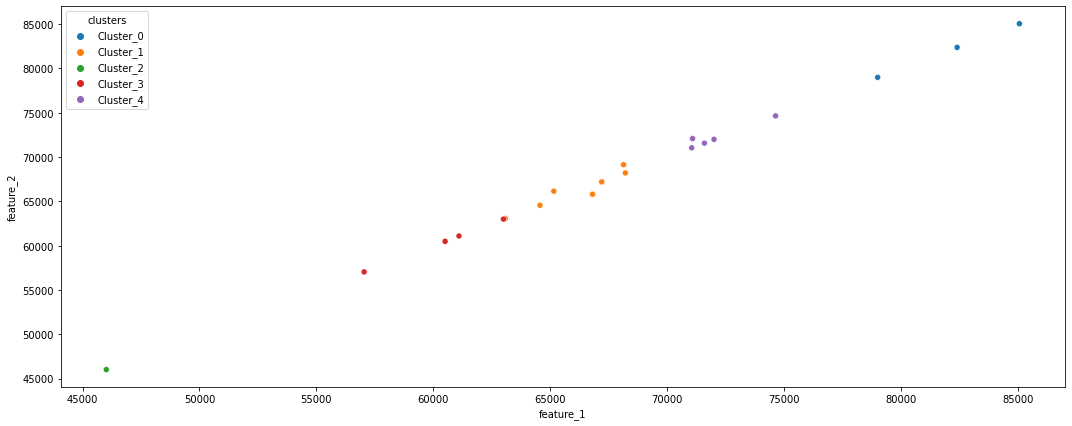

In [7]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue = 'clusters')

#for i in range(df.shape[0]):
#    plt.text(x=df.feature_1[i] ,y = df.feature_2[i] - 3000, s=df.perfume_name[i], 
#              fontdict=dict(color='red', size=10),
#              bbox=dict(facecolor='yellow',alpha=0.5)
#            )
plt.show()

# Interpretation

    - Based on the value of odor meter, the kmeans clustering is dividing the dataset into 5 clusters. 
    - All the clusters appear well separated and makes sense by visual inspection. 
    - If price of these perfumes available, then it will be interesting to understand how the price varies for each
      cluster. Inside a cluster, we should not expect much variation in price.